The following uses the `bbrc` branch of `pyxnat` (https://github.com/pyxnat/pyxnat/tree/bbrc) to fetch a sample case with FreeSurfer results from the XNAT CENTRAL platform. Results from cortical thickness estimation are returned as a Pandas DataFrame which is then cleaned and restructured as a simple dictionary.

Note that this step is optional and that dictionary may be created in any other suitable manner, including manually.

In [2]:
import pyxnat
x = pyxnat.Interface(config='/home/grg/git/pyxnat/pyxnat/tests/central.cfg')
p = x.select.project('nosetests5')
s = p.subject('rs')
e1 = s.experiment('CENTRAL02_E01603')
r = e1.resource('FREESURFER7')
df = r.aparc().set_index('region')
data = {'%s_%s'%(k, row.side) : float(row.value) 
        for k, row in df.iterrows() if row.side in ['left', 'right']}

list(data.items())[:5]

[('bankssts_left', 1.1),
 ('caudalanteriorcingulate_left', 1.0),
 ('caudalmiddlefrontal_left', 2.6),
 ('cuneus_left', 2.6),
 ('entorhinal_left', 0.6)]

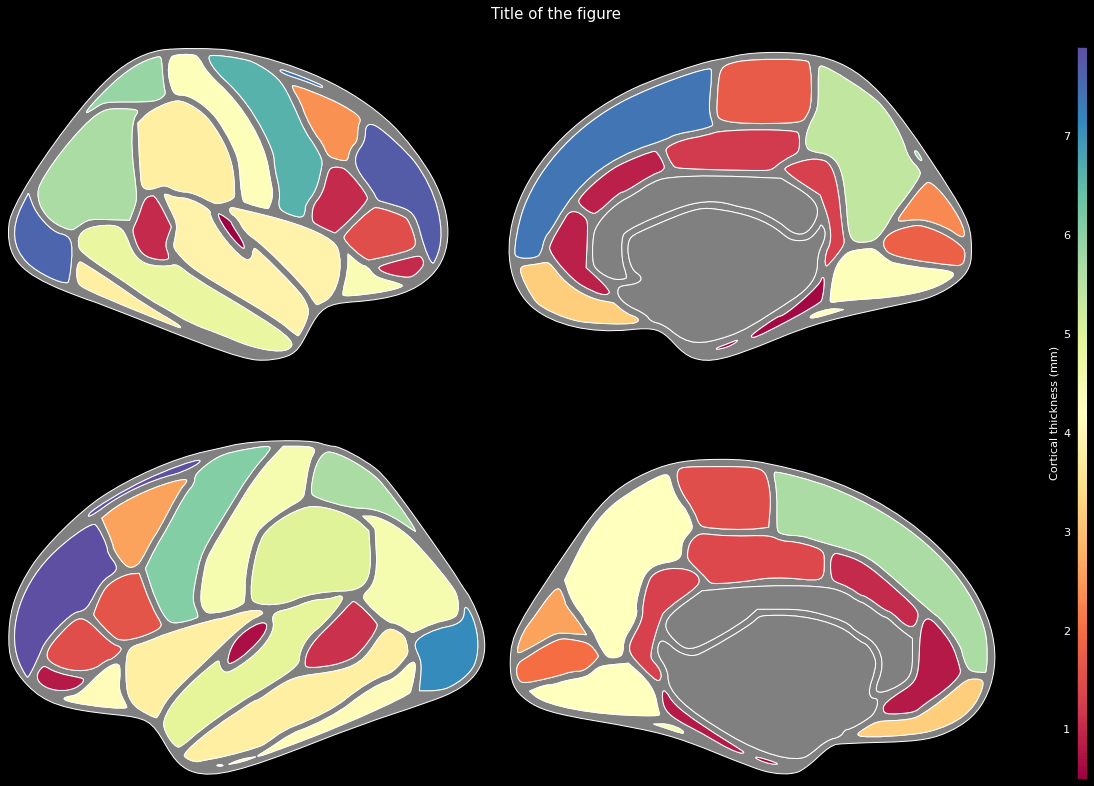

In [3]:
import ggseg
ggseg.plot_dk(data, background='k', edgecolor='w', cmap='Spectral', 
              bordercolor='gray', ylabel='Cortical thickness (mm)', title='Title of the figure')

Another example with `aseg` data

In [4]:
df = r.aseg().set_index('region')
data = {k : float(row.value) for k, row in df.iterrows()}

list((k, v) for k, v in data.items() if 'CC' in k)

[('CC_Posterior', 88.0),
 ('CC_Mid_Posterior', 96.0),
 ('CC_Central', 97.0),
 ('CC_Mid_Anterior', 88.0),
 ('CC_Anterior', 99.0)]

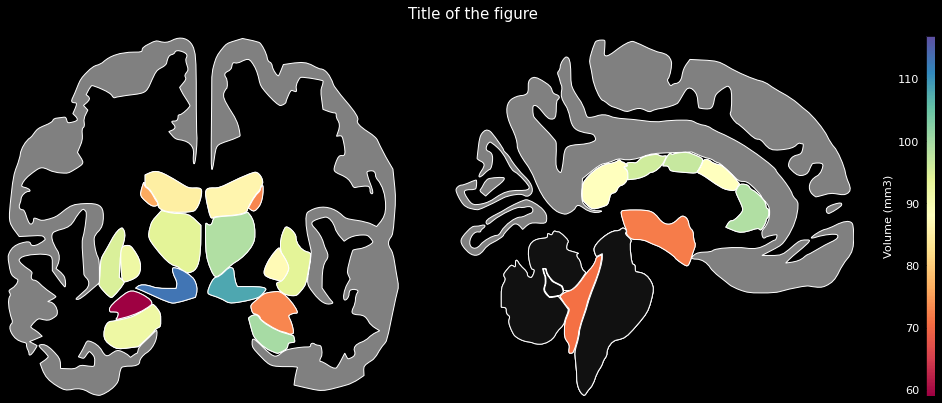

In [5]:
ggseg.plot_aseg(data, background='k', edgecolor='w', cmap='Spectral', 
                bordercolor='gray', ylabel='Volume (mm3)', title='Title of the figure')

Another example with the JHU WM atlas

In [6]:
data_jhu = {'Anterior thalamic radiation L': 0.3004812598228455,
            'Anterior thalamic radiation R': 0.2909256815910339,
            'Corticospinal tract L': 0.3517134189605713,
            'Corticospinal tract R': 0.3606771230697632,
            'Cingulum (cingulate gyrus) L': 0.3149917721748352,
            'Cingulum (cingulate gyrus) R': 0.3126821517944336,
            'Cingulum (hippocampus) L': 0.2284496426582336,
            'Cingulum (hippocampus) R': 0.2508412301540375,
            'Forceps major': 0.299083411693573,
            'Forceps minor': 0.2521731853485107,
            'Inferior fronto-occipital fasciculus L': 0.2457948923110962,
            'Inferior fronto-occipital fasciculus R': 0.2696700096130371,
            'Inferior longitudinal fasciculus L': 0.2393001765012741,
            'Inferior longitudinal fasciculus R': 0.2447357028722763,
            'Superior longitudinal fasciculus L': 0.2248284667730331,
            'Superior longitudinal fasciculus R': 0.2204412966966629,
            'Uncinate fasciculus L': 0.2281110733747482,
            'Uncinate fasciculus R': 0.2106734961271286,
            'Superior longitudinal fasciculus (temporal part) L': 0.2622972726821899,
            'Superior longitudinal fasciculus (temporal part) R': 0.3504709601402283}

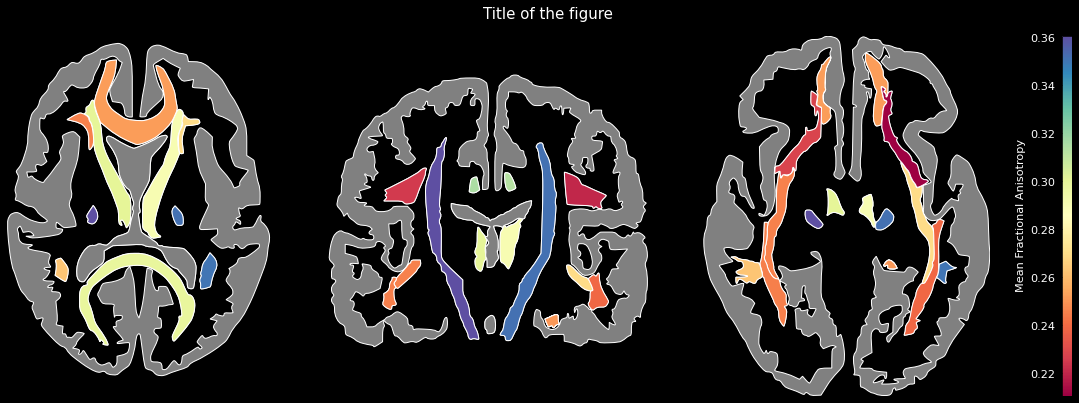

In [7]:
ggseg.plot_jhu(data_jhu, background='k', edgecolor='w', cmap='Spectral', 
               bordercolor='gray', ylabel='Mean Fractional Anisotropy', title='Title of the figure')